# Project 1 - Major League Baseball Analysis

In [3]:
#PROJECT SCOPE:

#Question 1 - How does the spending of each champion compare to the rest of the league?
#Objective 1 - Collect the salary spent for the world series champions by year
#Objective 2 - Collect the average salary spent for the losers by year
#Objective 3 - Summary DF and Graph comparing objective 1 and objective 2

#---------------------------------------------------------------------------------

#Question 2 - What are the guiding parameters for salary spent for winning teams?
#Objective 1 - Find the mean and STD for the salaries per year for the entire league
#Objective 2 - Calculate the number of STD's the winning salary deviates from the mean by year
#Objective 3 - Summary DF and Graph Objective 2

#----------------------------------------------------------------------------------

#Question 3 - Do the teams that spend the most, win the most?
#Objective 1 - Find the top 5 teams in salary spent per year
#Objective 2 - Find out how many times teams with a top 5 salary spent won the championship by year
#Objective 3 - Calculate the percentage of times a top 5 salary spent team won the championship

#----------------------------------------------------------------------------------

#Question 4 - Are there any commonalities between championship teams?
#Objective 1 - Summary DF of all World Series Champions statistics
#Objective 2 - Statisical Analysis on that Dataframe (mean of statistical categories)
#Objective 3 - Develop a statistical profile for a typical world series champion

In [4]:
#Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [5]:
#CSV Read Ins from Kaggle Website

#Teams File - Convert to DataFrame
teams_filepath = "Resources/Teams.csv"
teams_df = pd.read_csv(teams_filepath)

#Salary File - COnvert to DataFrame
salary_csvpath = "Resources/Salaries.csv"
salary_df = pd.read_csv(salary_csvpath)

In [6]:
#Dataframe Cleanup - Preparing Dataframes to Analyze

#Teams CSV - Organize Columns, Drop Years Prior to 1985
teams_df = teams_df[["name", "teamID", "yearID", "WSWin", "G", "W", "L", "R", "AB", "H", "2B", "3B", "HR", "BB", "SO", "SB", "ER", "ERA", "CG", "E"]]
teams_df = teams_df.loc[teams_df["yearID"] > 1984]

#Salary CSV - Group Salary Dataframe by YearID & TeamID, retrieve sum
salary_year = salary_df.groupby(by=['yearID','teamID'])['salary'].sum()
salary_df = pd.DataFrame(salary_year)

In [7]:
#Get Stats Data for the Winners & Losers of the World Series
ws_winners_df = pd.DataFrame(teams_df.loc[(teams_df["WSWin"] == "Y")])
ws_losers_df = pd.DataFrame(teams_df.loc[(teams_df["WSWin"] == "N")])

In [8]:
#Merge Dataframes to get Stats Data and Salary Data in one dataframe
combined_allteams_df = pd.merge(teams_df, salary_df, on=["yearID", "teamID"])
combined_wswinners_df = pd.merge(ws_winners_df, salary_df, on=["yearID", "teamID"])
combined_wslosers_df = pd.merge(ws_losers_df, salary_df, on=["yearID", "teamID"])

In [9]:
#See Combined Dataframe
combined_allteams_df.head()

,name,teamID,yearID,WSWin,G,W,L,R,AB,H,...,3B,HR,BB,SO,SB,ER,ERA,CG,E,salary
0,Atlanta Braves,ATL,1985,N,162,66,96,632,5526,1359,...,28,126,553,849.0,72.0,678,4.19,9,159,14807000
1,Baltimore Orioles,BAL,1985,N,161,83,78,818,5517,1451,...,22,214,604,908.0,69.0,694,4.38,32,115,11560712
2,Boston Red Sox,BOS,1985,N,163,81,81,800,5720,1615,...,31,162,562,816.0,66.0,659,4.06,35,145,10897560
3,California Angels,CAL,1985,N,162,90,72,732,5442,1364,...,31,153,648,902.0,106.0,633,3.91,22,112,14427894
4,Chicago White Sox,CHA,1985,N,163,85,77,736,5470,1386,...,37,146,471,843.0,108.0,656,4.07,20,111,9846178


In [10]:
#See World Series Winners Dataframe
combined_wswinners_df

,name,teamID,yearID,WSWin,G,W,L,R,AB,H,...,3B,HR,BB,SO,SB,ER,ERA,CG,E,salary
0,Kansas City Royals,KCA,1985,Y,162,91,71,687,5500,1384,...,49,154,473,840.0,128.0,567,3.49,27,127,9321179
1,New York Mets,NYN,1986,Y,162,108,54,783,5558,1462,...,31,148,631,968.0,118.0,513,3.11,27,138,15393714
2,Minnesota Twins,MIN,1987,Y,162,85,77,786,5441,1422,...,35,196,523,898.0,113.0,734,4.63,16,98,6397500
3,Los Angeles Dodgers,LAN,1988,Y,162,94,67,628,5431,1346,...,25,99,437,947.0,131.0,481,2.96,32,142,16850515
4,Oakland Athletics,OAK,1989,Y,162,99,63,712,5416,1414,...,25,127,562,855.0,157.0,497,3.09,17,129,15613070
5,Cincinnati Reds,CIN,1990,Y,162,91,71,693,5525,1466,...,40,125,466,913.0,166.0,548,3.39,14,102,14370000
6,Minnesota Twins,MIN,1991,Y,162,95,67,776,5556,1557,...,42,140,526,747.0,107.0,594,3.69,21,94,23361833
7,Toronto Blue Jays,TOR,1992,Y,162,96,66,780,5536,1458,...,40,163,561,933.0,129.0,626,3.91,18,93,44788666
8,Toronto Blue Jays,TOR,1993,Y,162,95,67,847,5579,1556,...,42,159,588,861.0,170.0,674,4.21,11,107,47279166
9,Atlanta Braves,ATL,1995,Y,144,90,54,645,4814,1202,...,27,168,520,933.0,73.0,493,3.44,18,100,47235445


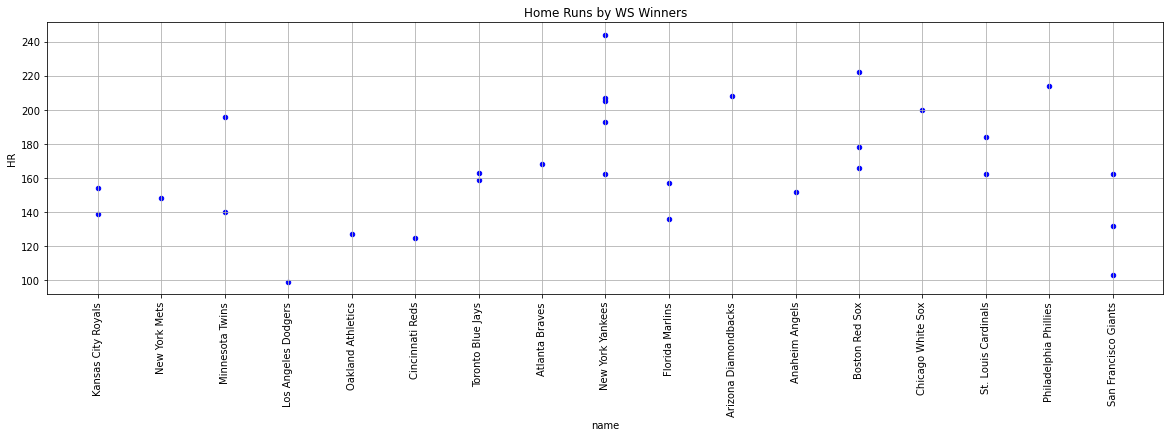

In [50]:
HR_plot = combined_wswinners_df.plot(kind="scatter", x="name", y="HR", grid=True, figsize=(20,5), title="Home Runs by WS Winners",
                          color="Blue")
plt.xticks(rotation=90)
HR_plot

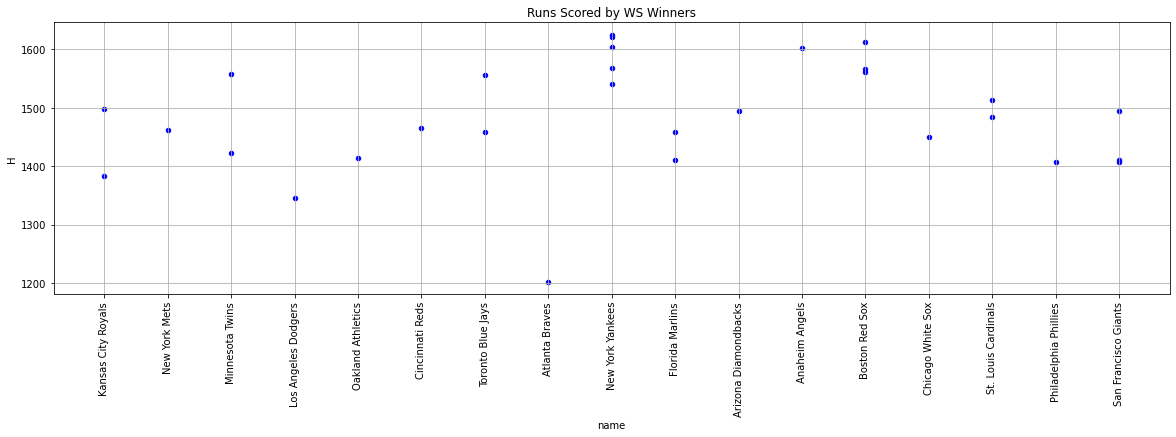

In [88]:
Hits_plot = combined_wswinners_df.plot(kind="scatter", x="name", y="H", grid=True, figsize=(20,5), title="Runs Scored by WS Winners",
                          color="Blue")
plt.xticks(rotation=90)
Hits_plot

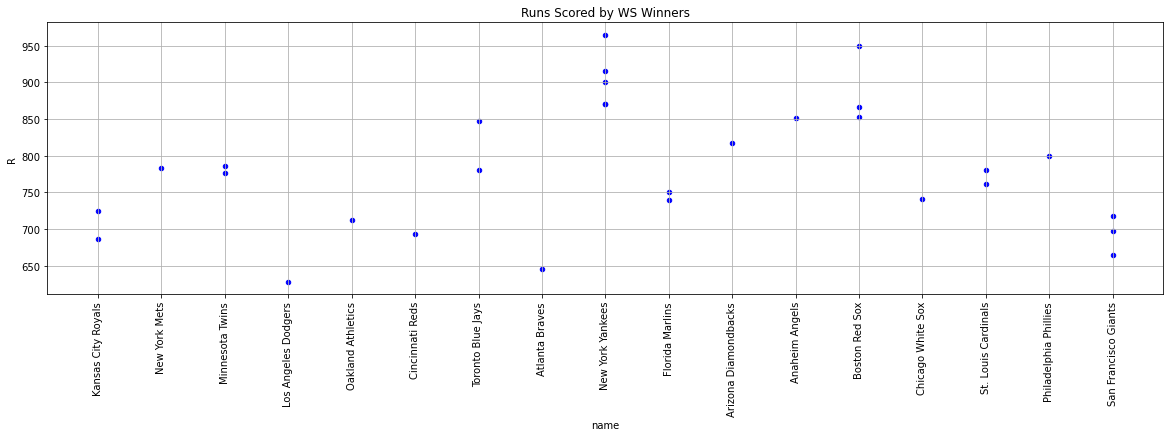

In [89]:
Runs_plot = combined_wswinners_df.plot(kind="scatter", x="name", y="R", grid=True, figsize=(20,5), title="Runs Scored by WS Winners",
                          color="Blue")
plt.xticks(rotation=90)
Runs_plot

In [ ]:
Runs_plot = combined_wswinners_df.plot(kind="scatter", x="name", y="R", grid=True, figsize=(20,5), title="Runs Scored by WS Winners",
                          color="Blue")
plt.xticks(rotation=90)
Runs_plot

In [81]:
ws_winner_stat_summary = combined_wswinners_df.drop(columns=['name', 'yearID', 'teamID', 'WSWin', 'G', 'salary'], axis = 0)
ws_winner_stat_summary.describe()

,W,L,R,AB,H,2B,3B,HR,BB,SO,SB,ER,ERA,CG,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,94.533333,66.766667,785.833333,5526.966667,1486.533333,286.933333,33.466667,166.833333,554.566667,990.300000,110.566667,614.300000,3.828333,11.533333,101.533333
std,6.328552,6.621196,88.823375,153.653996,94.977578,38.704836,8.661183,35.085200,88.650683,124.126507,33.163839,71.952163,0.455738,7.990224,17.793322
min,83.000000,48.000000,628.000000,4814.000000,1202.000000,210.000000,21.000000,99.000000,383.000000,747.000000,55.000000,481.000000,2.960000,2.000000,73.000000
25%,91.000000,64.000000,719.500000,5502.250000,1416.000000,262.000000,27.000000,142.000000,484.000000,915.250000,96.000000,573.250000,3.527500,6.000000,88.500000
50%,94.000000,67.000000,780.500000,5546.000000,1489.000000,288.500000,31.500000,162.000000,551.500000,978.000000,114.000000,614.000000,3.805000,8.500000,98.000000
75%,97.750000,70.750000,852.500000,5586.500000,1560.000000,301.500000,40.000000,195.250000,631.000000,1049.500000,130.500000,657.000000,4.107500,16.750000,114.000000
max,114.000000,78.000000,965.000000,5720.000000,1625.000000,373.000000,57.000000,244.000000,718.000000,1308.000000,170.000000,753.000000,4.760000,32.000000,142.000000


In [9]:
#See World Series Losers Dataframe
combined_wslosers_df.head()

,name,teamID,yearID,WSWin,G,W,L,R,AB,H,...,3B,HR,BB,SO,SB,ER,ERA,CG,E,salary
0,Atlanta Braves,ATL,1985,N,162,66,96,632,5526,1359,...,28,126,553,849.0,72.0,678,4.19,9,159,14807000
1,Baltimore Orioles,BAL,1985,N,161,83,78,818,5517,1451,...,22,214,604,908.0,69.0,694,4.38,32,115,11560712
2,Boston Red Sox,BOS,1985,N,163,81,81,800,5720,1615,...,31,162,562,816.0,66.0,659,4.06,35,145,10897560
3,California Angels,CAL,1985,N,162,90,72,732,5442,1364,...,31,153,648,902.0,106.0,633,3.91,22,112,14427894
4,Chicago White Sox,CHA,1985,N,163,85,77,736,5470,1386,...,37,146,471,843.0,108.0,656,4.07,20,111,9846178
